In [ ]:
import sys
!git clone https://www.github.com/hrmacbeth/turtle-dynamical.git
sys.path.append('turtle-dynamical')

%matplotlib inline

import matplotlib.pyplot as plt
from autograd import elementwise_grad
from draw_script import *

plt.rcParams['figure.figsize'] = [6, 6]

Cloning into 'turtle-dynamical'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 67 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), 95.23 KiB | 862.00 KiB/s, done.


# Define landscape and gradient (i.e., slope vector field)

This is the same landscape as in notebook 3, "Optimization".

In [ ]:
f = lambda x, y: -0.005 * (x ** 4 - 2 * x ** 3 - 2450 * x ** 2 + 7350 * x) - y ** 2

# To use the Rosenbrock landscape, comment out the line above and uncomment the line below.
# f = lambda x, y: - .0005 * (x - 40) ** 2 - .001 * (60 * (y - 10) + x ** 2) ** 2

Calculate gradient (i.e., slope vector field of landscape).

In [ ]:
dx = elementwise_grad(f, argnum=0) # these lines calculate the gradient of the landscape f
dy = elementwise_grad(f, argnum=1)

plt.rcParams['figure.figsize'] = [6, 6]

# Implement the optimization algorithms

Write the code for your optimization algorithm in the block below.  You might like to start by copying and modifying one of the reference algorithms provided.

In [ ]:
import numpy as np

class OptimizerStatus:
  def __init__(self, init_pos, **kwargs):
    self.update_signs = [0 for i in init_pos] #initializing list update_signs

    alpha_input = input("Input a " + "\u0332".join("float ") + "alpha value: ") #just for fun, allows customization of alpha value before running
    self.alphas = [float(alpha_input) for i in init_pos] #initializing list alphas with alpha_init = alpha_input (as long as alpha_input is a number)

def modifier(update_sign, alpha, grad): #takes update_sign, alpha, grad from get_updates, modifies and returns update_sign and alpha according to relative position

  sign_update = update_sign * grad #multiply each element of update_signs by its respective element in grads

  if sign_update > 0: #if the update_sign and grad are in the same direction
    alpha *= 1.2 #modifies alpha by arbitrary multiplication factor of 1.2
  elif sign_update == 0: #if either update_sign or grad is 0 at that location
    update_sign = np.sign(grad)  #set update_sign to the same sign as that of the grad element
  else: #if the update_sign and grad are in opposite directions
    update_sign = 0 #replace the number at the index with 0
    alpha = alpha * 0.5 #modifies alpha by arbitrary multiplication factor of 0.5

  return update_sign, alpha

def get_updates(optimizer_status, grads, **kwargs):

  vector_modifier = np.vectorize(modifier)
  vectors = [vector_modifier(update_sign, alpha, grad) for update_sign, alpha, grad in zip(optimizer_status.update_signs, optimizer_status.alphas, grads)]
  optimizer_status.update_signs = [vector[0] for vector in vectors]
  optimizer_status.alphas = [vector[1] for vector in vectors]

  updates = [update_sign * alpha for update_sign, alpha in zip(optimizer_status.update_signs, optimizer_status.alphas)] #multiplies update sign by alpha for the final output

  return updates

def trigger_stopping(optimizer_status, **kwargs):
  return True

# Test algorithm

Running the following code lets you test the algorithm you implemented.

Input a f̲l̲o̲a̲t̲ alpha value: 339
Stopped at iteration 59, height is 8360.624999786733.
Endpoint is (-35.00008789824327, 0.00012596773500361732).


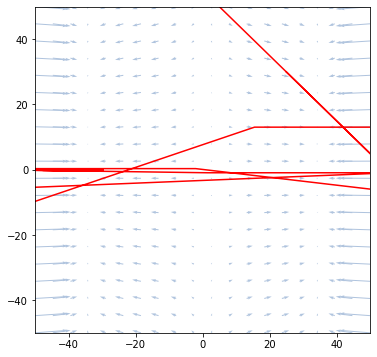

In [ ]:
plot_vector_field(dx, dy)

init_pos = [25., 30.]

init()

# Set up the optimization process to start at the point (25, 30)
# if you modify this, note that the . is important
jump_to(init_pos[0], init_pos[1])

prev_height = 0 # just introduce the variable `prev_height` and set it to some value at random, I chose 0
no_improvement_count = 0

optimizer_status = OptimizerStatus(init_pos)

for i in range(500):
  height = f(x(), y()) # calculate current height
  if height < prev_height + 0.1:
    no_improvement_count += 1
  else:
    no_improvement_count = 0
  if no_improvement_count > 10:
    if trigger_stopping(optimizer_status):
      print(f"Stopped at iteration {i}, height is {height}.")
      break
    else:
      no_improvement_count = 0

  prev_height = height

  grads = [dx(x(), y()), dy(x(), y())] # put the x- and y-components of the vector field together as a list
  updates = get_updates(optimizer_status, grads)
  move(updates[0], updates[1])  # move by the calculated updates

print(f"Endpoint is ({x()}, {y()}).") # This will output the final position -- hopefully the maximum!

draw(color='red')

# Another test

The following test is helpful for troubleshooting.  It tests for certain things that can go wrong in high dimensions that don't turn up when you are only working in two dimensions.  If your algorithm is implemented correctly, it should give the same output as the other test block.  If the other test block is working but this one gives errors, contact the instructor for help.

Input a f̲l̲o̲a̲t̲ alpha value: 10
Stopped at iteration 27, height is 6645.6249820224.
Endpoint is (35.0, -0.004239999999999286).


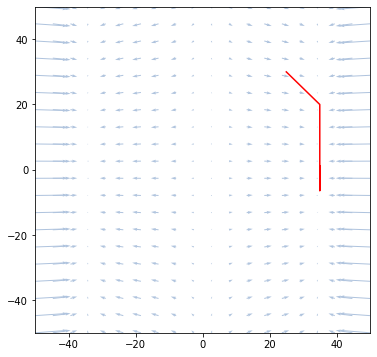

In [ ]:
plot_vector_field(dx, dy)

init_pos = [np.array([25.]), np.array([30.])]

init()

# Set up the optimization process to start at the point (25, 30)
# if you modify this, note that the . is important
jump_to(init_pos[0][0], init_pos[1][0])

prev_height = 0 # just introduce the variable `prev_height` and set it to some value at random, I chose 0
no_improvement_count = 0

optimizer_status = OptimizerStatus(init_pos)

for i in range(500):
  height = f(x(), y()) # calculate current height
  if height < prev_height + 0.1:
    no_improvement_count += 1
  else:
    no_improvement_count = 0
  if no_improvement_count > 10:
    if trigger_stopping(optimizer_status):
      print(f"Stopped at iteration {i}, height is {height}.")
      break
    else:
      no_improvement_count = 0

  prev_height = height

  grads = [np.array([dx(x(), y())]), np.array([dy(x(), y())])] # put the x- and y-components of the vector field together as a list
  updates = get_updates(optimizer_status, grads)
  move(updates[0][0], updates[1][0])  # move by the calculated updates

print(f"Endpoint is ({x()}, {y()}).") # This will output the final position -- hopefully the maximum!

draw(color='red')